# Math fundamentals

To fully understand deep learning, you need to know some linear algebra and calculus.  We'll cover the basics in this lesson, including how to use NumPy to apply the math using Python.  This will give you a foundation for the rest of this course.

Math terminology can be intimidating, but don't worry - everything will be explained using code, diagrams, and plain English.

## Vectors

At a very basic level, linear algebra is about manipulating vectors.  This manipulation happens by combining and scaling vectors.  A vector is a one-dimensional array of numbers.  Here's an example of a vector:

$$v = [1,1]$$

We can create this vector using NumPy, a Python library for working with arrays.  We'll use NumPy to create and manipulate vectors and matrices.

In [1]:
import numpy as np

# Create a vector as a numpy array
v = np.array([1,1])
print(v)

[1 1]


As you can see, our vector has two elements, `1` and `1`.  We call this one-dimensional since it only has elements in one direction.  Here's an example of a two-dimensional array, also called a matrix.  A matrix is a table of data with rows and columns. We can think of a vector as a single row or a single column from a matrix.

In [2]:
# Create a matrix as a numpy array
m = np.array([[1,1],[1,0]])
print(m)

[[1 1]
 [1 0]]


We'll discuss matrices more later, but for now, let's keep talking about vectors.  We can graph our vector to understand it better.  By convention, we always draw vectors starting at the origin (0,0).  Here's a diagram of our vector `v`:

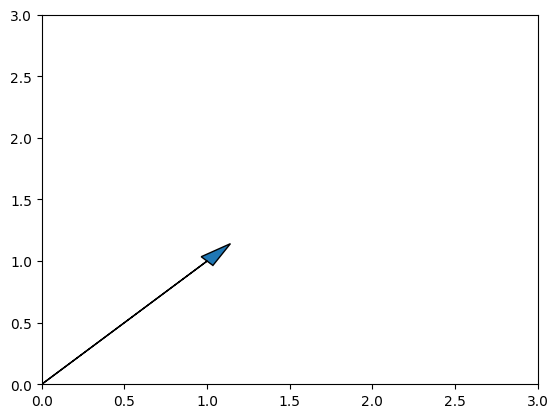

In [3]:
import matplotlib.pyplot as plt

plt.xlim(0, 3)  # set x-axis limits
plt.ylim(0, 3)  # set y-axis limits

# Plot the arrow
plt.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.2)  # draw arrow

As you can see, we draw a line from the coordinate `0,0` to the coordinate `1,1`.  The vector specifies the end of the line.  The first element in the vector is the x-coordinate of the end of the line, and the second element is the y-coordinate.  We draw the vector with an arrow to indicate the direction of the vector.  In this case, the vector is pointing up and to the right.

The length of the vector, also called the norm, is the distance from the origin to the end of the line.  We can calculate the norm of a vector using this formula:

$$||x||_{2} = \sqrt{x_{1}^{2} + x_{2}^{2} + \cdots + x_{n}^{2}}$$

This is called the L2 norm, and is the most common norm in deep learning.  We're essentially taking the distance from the origin to the end of the vector.  We can calculate the L2 norm of our vector using NumPy:

In [4]:
np.sqrt(np.sum(v**2))

1.4142135623730951

We would draw a vector with 3 elements in 3-dimensional space.  Here's an example of a 3-dimensional vector:

In [5]:
# Create a vector as a numpy array
v = np.array([0,1,1])
print(v)

[0 1 1]


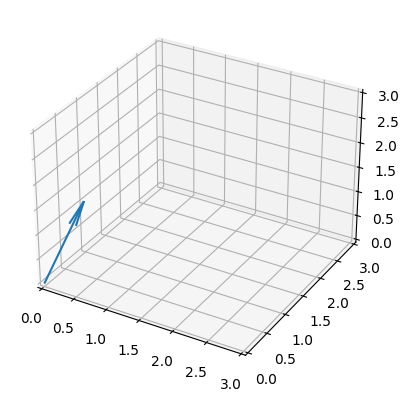

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])

# Plot vector
ax.quiver(0,0,0, v[0], v[1], v[2], length=1)

The number of elements in a vector determines the number of dimensions of the *vector space* that the vector exists in.  A vector with 1 element exists in a 1-dimensional space, a vector with 2 elements exists in a 2-dimensional space, and a vector with 3 elements exists in a 3-dimensional space.  In deep learning, you'll often work with vectors that have thousands of elements - more than we can visualize.

The dimensionality of a vector space is different from the dimensionality of an array.  A vector is a one-dimensional array, but it can exist in a multi-dimensional vector space.

You may have noticed that we indexed `v` using the numbers `0`, `1`, and `2` when we drew our plot.  In NumPy, we index a vector with a single number (since it is a one-dimensional array).  The index corresponds to the position of the element we want.

### Vector Operations

We can scale vectors by scalars (single numbers).  For example, we can multiply our 2-dimensional vector `1,1` by `.5` to get `.5, .5`:

In [7]:
v = np.array([1,1]) * .5
print(v)

[0.5 0.5]


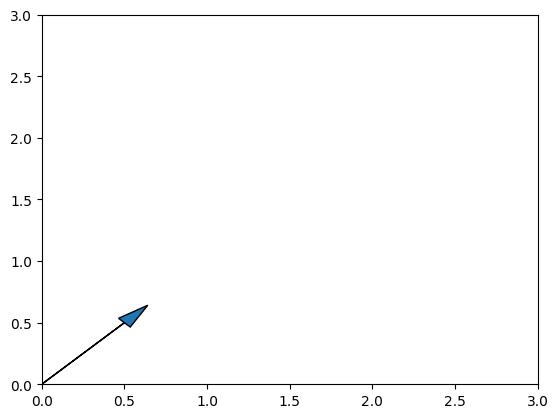

In [8]:
plt.xlim(0, 3)  # set x-axis limits
plt.ylim(0, 3)  # set y-axis limits

# Plot the arrow
plt.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.2)  # draw arrow

You can see that the vector now ends at `.5, .5`.  We can also add vectors together.  For example, we can add `1,1` and `1,0` to get `2,1`:

In [9]:
v = np.array([1,1]) + np.array([1,0])
print(v)

[2 1]


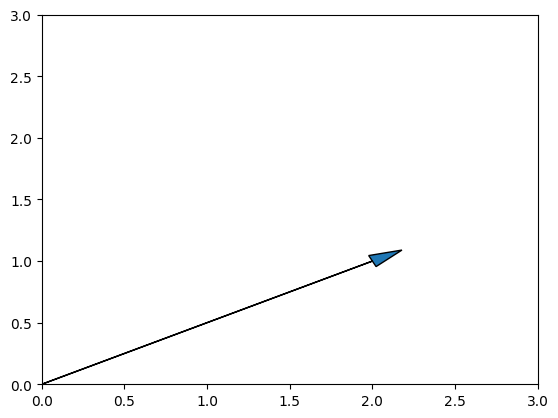

In [10]:
plt.xlim(0, 3)  # set x-axis limits
plt.ylim(0, 3)  # set y-axis limits

# Plot the arrow
plt.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.2)  # draw arrow

This vector now ends at `2,1`.

We can use the basis vectors `0,1` and `1,0` along with our operations (multiply by a scalar and add vectors) to create any vector in the 2-d Euclidean space that we normally use in graphs.

Here's a plot of the basis vectors:

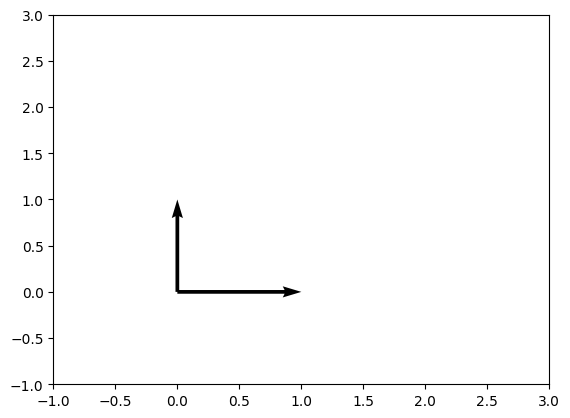

In [11]:
v1 = np.array([1,0])
v2 = np.array([0,1])

plt.xlim(-1, 3)  # set x-axis limits
plt.ylim(-1, 3)  # set y-axis limits

# Plot the arrows with plt.quiver
plt.quiver([0,0], [0,0], [v1[0],v2[0]], [v1[1],v2[1]], angles='xy', scale_units='xy', scale=1)

If we wanted to "reach" the point `.3,1`, we would do the following operations:

1. Multiply `1,0` by `.3` to get `.3,0`
2. Add `.3,0` to `0,1` to get `.3,1`

We call the set of vectors that can be "reached" from a given set of vectors the *span* of the vectors.  In this case, the span of `0,1` and `1,0` is the entire 2-dimensional Euclidean space.

One additional property that is important is that `0,1` and `1,0` are *orthogonal* to each other.  This means that they don't have any overlap in the directions that they point.  We can check this using NumPy:

In [12]:
# Find the dot product of v1 and v2
np.dot(v1, v2)

0

The dot product tells you how much the direction of one vector overlaps with the direction of another vector.  Since the dot product is 0, we know that the vectors are orthogonal.

### Basis Change

We express coordinates in terms of a basis.  We know that the canonical basis vectors for the 2-dimensional Euclidean space are `0,1` and `1,0`.  A coordinate specifies how much we multiply each canonical basis vector to get the vector we want.  For example, the coordinate `2,1` specifies that we multiply `1,0` by `2` and `0,1` by `1` to get `2,0` and `0,1`, which we then add together to get `2,1`.

We call this a *linear combination* of the basis vectors.

In deep learning, we often change the basis that we use to express coordinates.  For example, we might want to express the coordinates `2,1` in terms of the basis vectors `1,1` and `1,-1`.  Showing you how to do a basis change is outside the scope of this lesson, but it's important to know that it's possible.

## Matrices

We can arrange vectors into matrices.  A matrix is a two-dimensional array of numbers.  By convention, we use lower-case letters to represent vectors, and upper-case letters to represent matrices. Here's an example of a 2x2 matrix with both of the vectors from above:

In [13]:
# Create a matrix as a numpy array
M = np.array([[0,1,2], [1,0,2], [2,1,0]])
print(M)

[[0 1 2]
 [1 0 2]
 [2 1 0]]


A matrix has a certain number of rows and columns.  We can find the number of rows and columns in a matrix using the `shape` attribute:

In [14]:
M.shape

(3, 3)

To index a matrix, we need 2 numbers instead of 1.  The first number is the row index, and the second number is the column index.  For example, we can get the element at the first row and first column of `M` like this:

In [15]:
M[0,0]

0

We can also get entire rows and columns at once, or slices of them:

In [16]:
# Select the entire first row
print(M[0])
# Select the entire first column
print(M[:,0])
# Select elements in the upper left corner
print(M[:2, :2])

[0 1 2]
[0 1 2]
[[0 1]
 [1 0]]


We can also use indexing for assignment:

In [17]:
# Set the first element to 10
M[0,0] = 10

In deep learning, you will often work with arrays that are 3 or more dimensions.  To index these, you'll need to use as many index numbers as there are dimensions.

## Linear Regression

Now that we understand a bit about vectors and matrices, let's look at a concrete example.  We'll use linear regression to predict tomorrow's temperature.  We do this with the equation $\hat{y}=wx + b$ where $\hat{y}$ is the prediction, $w$ is the weight, $x$ is the input, and $b$ is the bias.

We can first read in our data using pandas:

In [18]:
import pandas as pd

# Read in the data
data = pd.read_csv("../data/clean_weather.csv", index_col=0)
# Fill in any missing values in the data with past values
data = data.ffill()

# Show the first 5 rows of the data
data.head(5)

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


In the table above, tomorrow's temperature is `tmax_tomorrow`, today's max temperature is `tmax`, today's min temperature is `tmin`, and how much it rained today is `rain`.  We're going to use `tmax`, `tmin`, and `rain` to predict `tmax_tomorrow`.

Because we have more than one predictor, we can extend our equation to multiple predictors like this:

$$\hat{y} = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + b$$

So to get a prediction for tomorrow's temperature $\hat{y}$, we can take a value called $w_{1}$, and multiply it by `tmax`, then take $w_{2}$ and multiply it by `tmin`, then take $w_{3}$ and multiply it by `rain`.  We'd then add in $b$.  Here's how that could look:

In [19]:
.7 * 60 + .3 * 35 + .1 * 0 + 10

62.5

The above could be our prediction for the first row of the data, if our $w$ values are `.7`, `.3`, and `.1`, and our $b$ value is `10`.  We'll discuss how you can calculate the correct $w$ and $b$ values later, but for now, let's just use these values.

Whenever we want to make a new prediction, we apply the same equation:

In [20]:
w1 = .7
w2 = .3
w3 = .1
b = 10

w1 * 52 + w2 * 39 + w3 * 0 + b

58.099999999999994

### Vector multiplication

You may notice that we're actually multiplying two vectors, then adding the results together.  We can think of $w$ and $x$ as vectors that we're multiplying.  We multiply each element in the $x$ vector by the corresponding element in the $w$ vector.  We then add up all the results.  This is called a *dot product*.

Here's an example of a dot product:

In [21]:
w = np.array([.7, .3, .1])
x = np.array([52, 39, 0])

# Multiply w and x elementwise
np.dot(w, x)

48.1

Our result is `48.1`.  We then need to add the bias term `b` to get our prediction.  We can do this in NumPy like this:

In [22]:
np.dot(w, x) + b

58.1

### Matrix Multiplication

What if we want to make predictions for multiple rows at once?  It would be annoying to have to do the dot product for each row.  Luckily, we can use linear algebra to help us out.  We first need to convert our x data and our weights to a matrix.  We can then do a matrix multiplication to get our predictions.

Matrix multiplication is a linear algebra operation defined like this:

$$
\begin{equation}
    A \times B =
    \begin{bmatrix}
      a_{11} & a_{12} \\
      a_{21} & a_{22}
    \end{bmatrix}
    \times
    \begin{bmatrix}
    b_{11} \\
    b_{21}
    \end{bmatrix}
    =
    \begin{bmatrix}
      a_{11}b_{11} + a_{12}b_{21} \\
      a_{21}b_{11} + a_{22}b_{21}
    \end{bmatrix}
\end{equation}
$$

We can visualize how it works with this gif:

![Matrix mult](images/linalg/matrix_mult.gif)

As you can see, we essentially take each row of matrix A and multiply it by each column of matrix B, then add everything together.  The number of columns in the first matrix has to equal the number of rows in the second matrix.

This is very useful to us when we're multiplying weights by input numbers.  We can take our $x$ values, put them into a matrix, then multiply by the weights (also in a matrix):

In [23]:
# Convert the first 3 rows of data into a numpy matrix from a pandas dataframe
# the first column of the matrix is tmax, second is tmin, third is rain

X = data[["tmax", "tmin", "rain"]].iloc[:3].to_numpy()
X

array([[60., 35.,  0.],
       [52., 39.,  0.],
       [52., 35.,  0.]])

We can verify the shapes of our matrices to make sure they can be multiplied:

In [24]:
# Print the shape (number of rows and columns) in X
X.shape

(3, 3)

In [25]:
# Print the shape of w
w.shape

(3,)

As we can see, `x` is a matrix with `3` rows and `3` columns.  `w` is actually a vector with `3` columns.

`x` has length `3` in dimension `0` (rows) and length `1` columns.  `w` has length `3` in dimension `0`.

We'll need to convert `w` from a vector into a matrix.  To do that, we can use the numpy `reshape` method.  We pass in our desired lengths in each dimension:

In [26]:
# Reshape w into a 3 by 1 matrix
# The new dimensions must match the number of elements in w
W = w.reshape(3,1)
W

array([[0.7],
       [0.3],
       [0.1]])

In [27]:
W.shape

(3, 1)

We now have a `3x3` matrix, and a `3x1` matrix.  Since the number of columns in `x` matches the number of rows in `w`, we can multiply them:

In [28]:
X @ W

array([[52.5],
       [48.1],
       [46.9]])

We can now add in our $b$ value, `10`.  $b$ is just a single number.  When we add it to `x @ w`, it will be broadcast across the matrix (added to each element):

In [29]:
b = np.array([10])
X @ W + b

array([[62.5],
       [58.1],
       [56.9]])

This gives us the same results as when we manually multiplied our `w` and `x` values.  This is the power of matrix multiplication - it enables us to store all of our parameters ($w$ and $b$ values) into arrays and then use them to modify our inputs.  This is a lot faster than keeping track of each individual variable!

## The Normal Equation

Earlier, we used values for $w$ and $b$ that were given to us.  We can also directly calculate the correct values for $w$ and $b$ using the *normal equation*.

The normal equation is a mathematical equation that gives us the exact solution for $w$ and $b$ that minimizes the error of our model.  It's defined like this:

$$W = (X^T X)^{-1} X^T Y$$

You can think of this equation as finding the coefficients $W$ that project the coordinates $Y$ onto the basis $X$. Another way to say this is that we're multiplying the predictors $X$ by the weights $W$ and trying to get as close as possible to $Y$.

Yet another way to say this (it's a complicated concept!) is that we're changing the basis vectors of $Y$ to the vectors in $X$.  The coefficients $W$ find a way to do this while minimizing error.

We won't go into more detail on this here, but I recommend reading [this book](https://mml-book.github.io/) for more detail.


### Matrix Transposition

You may have noticed a term in the equation that looks like $X^T$.  This is called *matrix transposition*.  It's a way to switch the rows and columns of a matrix.  For example, we can transpose our weights and $X$ values:

In [30]:
# Use .T to get the transpose of a matrix
W.T @ X.T + b

array([[62.5, 58.1, 56.9]])

Transposition takes the `3x1` weight matrix, and turns it into a `1x3` matrix.  It then transposes the `3x3` x matrix.  The dimensions of x will stay the same, but transposition will switch the rows and columns:

In [31]:
W.T

array([[0.7, 0.3, 0.1]])

In [32]:
X.T

array([[60., 52., 52.],
       [35., 39., 35.],
       [ 0.,  0.,  0.]])

`W.T @ X.T` will multiply each column in the weight matrix by each row in the x matrix.  This is the exact same thing that will happen when we do `X @ W`.  It's just that `W.T @ X.T` returns a `1x3` matrix, and `X @ W` returns a `3x1` matrix.  So we need to do another transposition to correct this:

In [33]:
# The numpy allclose function tells us if two matrices are approximately equal
np.allclose((W.T @ X.T).T, X @ W)

True

Above, we use `np.allclose` to ensure that both multiplications return the same result.  When comparing the results of matrix multiplication we usually use `np.allclose` instead of `==` because the way computers represent floating point numbers can cause the same number to appear slightly differently.  You can see an explanation for this [here](https://floating-point-gui.de/).

### Matrix Inversion

You may have also noticed this term in the normal equation - $(X^T X)^{-1}$. This is called *matrix inversion*.  The inverse of a matrix is similar to the inverse of a number.  For example, the inverse of `4` is `1/4`, and `4 * 1/4` equals `1`.  $X \cdot X^{-1}$ is equal to the identity matrix, $I$.  The identity matrix is a matrix with 1s on the diagonal, and 0s everywhere else.  It's a way to represent the number 1 in matrix form.

Here's the `3x3` identity matrix:

In [34]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Now we can invert our `X` matrix:

In [35]:
# Use np.linalg.inv to get the inverse of a matrix
np.linalg.inv(X)

LinAlgError: Singular matrix

If any rows and columns of a matrix are linear combinations of other rows and columns, then the matrix is singular.  This means that the matrix cannot be inverted.  Here's an example:

In [36]:
# This matrix is singular
np.array([[1, 2], [2, 4]])

# This matrix is not singular
np.array([[1, 2], [3, 6]])

array([[1, 2],
       [3, 6]])

The reason for this is when a matrix is singular, the length of the matrix is 0 in one dimension.  This means that the area of the matrix is 0.  The formula for the inverse uses $1 / \text{area}$ as a term, which is undefined.  This makes the inverse of a singular matrix also undefined.

To correct for this, we can add a small "ridge" to the diagonal of the matrix by scaling the identity matrix.  This forces each row and column to be unique (not a linear combination of others).

This is known as ridge regression:

In [37]:
# Add a ridge to the diagonal of the matrix
np.linalg.inv(X + 0.1 * np.eye(3))

array([[ 0.07378611, -0.06604895,  0.        ],
       [-0.09812987,  0.11341549,  0.        ],
       [-4.02332472, -5.34996509, 10.        ]])

In [38]:
# This returns the identity matrix
ridge = X + 0.1 * np.eye(3)
ridge @ np.linalg.inv(ridge)

array([[ 1.00000000e+00,  5.55111512e-17,  0.00000000e+00],
       [ 1.06185910e-16,  1.00000000e+00,  0.00000000e+00],
       [ 1.66403976e-16, -2.96151798e-16,  1.00000000e+00]])

### Solving The Equation

We can now use the normal equation to solve for $W$:

In [39]:
# Load in our Y values from the data
Y = data[["tmax_tomorrow"]].iloc[:3].to_numpy()

# Use the normal equation to solve for W
W = np.linalg.inv(X.T @ X + .1 * np.eye(x.shape[0])) @ X.T @ Y
W

array([[0.38283829],
       [0.86270249],
       [0.        ]])

In [40]:
# Multiply X by W to get our predictions
X @ W

array([[53.16488447],
       [53.55298814],
       [50.10217817]])

In [41]:
Y

array([[52.],
       [52.],
       [53.]])

As you can see, our predictions are pretty close to the actual values.  We left out $b$ to make the calculation simpler, but you could also use this method to calculate it (but it's out of scope of this lesson!).

## Broadcasting

A couple of sections back, we used broadcasting to add the bias `b` to the result of `X @ W`.  Broadcasting enables arrays with compatible shapes to be added or multiplied.

If shapes are compatible, it means that:
* The smaller array has all of its dimensions exactly matching the length dimensions of the larger array
* Or the smaller array is length 1 in the non-matching dimensions.

Here are some examples:

In [42]:
# np.ones enables us to create an array filled with ones of a certain shape

A = np.ones((5,1))

# This works
A + np.ones((1,1))

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [43]:
# This works
A + np.ones((1))

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [44]:
# This does not work
A + np.ones((2,1))

ValueError: operands could not be broadcast together with shapes (5,1) (2,1) 

We can also use broadcasting to multiply individual elements:

In [45]:
# np.full initializes an array filled with a given value
# Using the * means that each element in array b is multiplied by the elements in array b
A * np.full((1,1), 2)

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [46]:
# np.random.rand generates random numbers between 0 and 1 of a given shape
A * np.random.rand(5,1)

array([[0.60888367],
       [0.27445549],
       [0.41672986],
       [0.18109412],
       [0.89991161]])

## Derivatives

The last math concept we'll cover is derivatives, a key part of calculus.  We'll cover derivatives in a lot more depth later, so this will just be a high-level overview.

Derivatives tell us the rate of change of a function.  For example, the derivative of $x^2$ is $2x$.  Let's look at how this works, by first plotting $f(x) = x^2$:

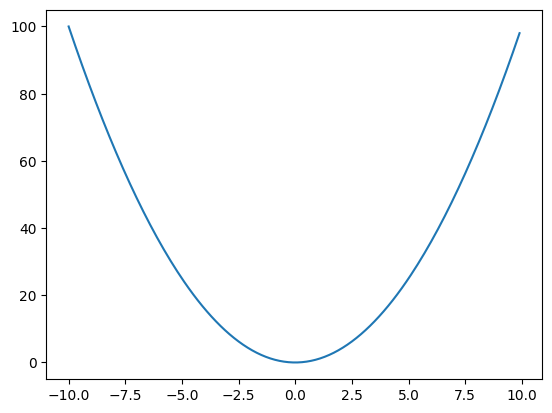

In [47]:
import matplotlib.pyplot as plt

# Create a list of numbers from -10 to 10, stepping by .1
xs = np.arange(-10, 10, .1)
# Square all of our x values
ys = xs ** 2

# Plot the result
plt.plot(xs, ys)

The function graph has a curved shape.  This is because the difference between y values is increasing as x gets further from `0`.   For example, if x is positive, $(x+2) ^ 2 - (x+1) ^ 2$ is greater than $(x+1) ^ 2 - x ^ 2$.  If x is negative, $(x-2) ^ 2 - (x-1) ^ 2$ is greater than $(x-1) ^ 2 - x ^ 2$.  We can also say that the slope of the function is increasing as we get further from `0`.

As you can see below, the derivative is the slope between 2 points on the function curve:

![slope](images/linalg/slope.svg)

We can calculate the slope by the equation $\frac{y_2 - y_1}{x_2 - x_1}$, where $x_2$ and $x_1$ are the x values of 2 points, and $y_2$ and $y_1$ are the y values of the same points.

In [48]:
# Find 2 x points close to 5
x1 = 5 - 1e-8
x2 = 5 + 1e-8

# Calculate the corresponding y values
y1 = x1 ** 2
y2 = x2 ** 2

# Calculate the slope (or derivative)
# This will equal 2 times the midpoint of the x values (5)
(y2 - y1) / (x2 - x1)


10.0

Derivatives are at a single point, so we would say that $f'(5) = 10$.  This means that the rate of change of $x^2$ at $x=5$ is $10$.

We can now plot the derivative, $f'(x) = 2x$:

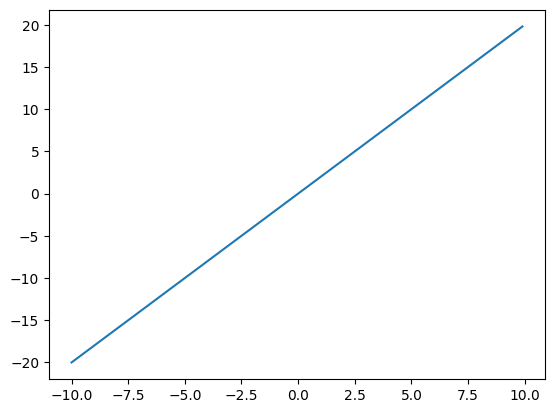

In [49]:
ys = xs * 2

# Plot the derivative
plt.plot(xs, ys)

As you can see, the derivative is an upward-sloping line.  This tells us that the rate of change of the function increases as x increases.

Derivatives are important for training neural networks.  They allow us to determine how much to increase or decrease our network parameters.  We'll learn more about this in the next lesson.

You usually don't need to know how to find the equation of the derivative yourself, since you'll be given it beforehand.  In a later lesson, we'll discuss how to find the derivative if you need to.

## Wrap-up

In the next lesson, we'll build on what we learned here to automatically calculate the correct $w$ and $b$ values for linear regression using gradient descent.  Gradient descent is a foundational concept of neural networks.  I hope to see you there!